In [1]:
# Librería para calcular de forma fácil la exactitud

%pip install torchmetrics --quiet

Note: you may need to restart the kernel to use updated packages.


Usando una librería de python (Keras o Pytorch) desarrolle los modelos de Convolutional Neural Networks que se describen para cada
problema en particular (usar una jupyter notebook por cada dataset y entregar todos en una carpeta zip).


1. MNIST Dataset. Escalar las imágenes en un rango de [0,1]. Usar 10% del conjunto de prueba para validación en el entrenamiento. Usar
como función de perdida categorical_crossentropy, optimizador adam y métrica exactitud durante el entrenamiento de 15 épocas. Aplicar
zero-padding en las capas conv2d. Reportar valor de perdida y exactitud para entrenamiento y prueba. Tomando como referencia el
siguiente diagrama:

1. Escalar las imágenes en un rango de [0,1]. 


In [2]:
import torchvision.datasets as datasets
from torchvision import transforms

# Normalizamos las imágenes en rango de 0 y 1
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Cargar dataset y normalizar
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

In [3]:
next(iter(mnist_trainset))

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

2. Usar 10% del conjunto de prueba para validación en el entrenamiento. 


In [4]:
from torch.utils.data import random_split

# Usar 10% del conjunto de prueba para validación en el entrenamiento. 
test_dataset_size = len(mnist_testset)

validation_size = int(test_dataset_size * 0.1)
test_size = test_dataset_size - validation_size

mnist_validationset, mnist_testset = random_split(mnist_testset, [validation_size, test_size])

print(f"Tamaño del conjunto de entrenamiento: {len(mnist_trainset)}")
print(f"Tamaño del conjunto de prueba: {len(mnist_testset)}")
print(f"Tamaño del conjunto de validación: {len(mnist_validationset)}")

Tamaño del conjunto de entrenamiento: 60000
Tamaño del conjunto de prueba: 9000
Tamaño del conjunto de validación: 1000


In [5]:
from torch.utils.data import DataLoader

batch_size = 64

# Crear los conjuntos de entrenamiento, prueba y validación
train_data = DataLoader(dataset=mnist_trainset, 
                        batch_size=batch_size,
                        num_workers=2,
                        shuffle=True)

test_data = DataLoader(dataset=mnist_trainset, 
                        batch_size=batch_size,
                        num_workers=2)

val_data = DataLoader(dataset=mnist_validationset, 
                        batch_size=batch_size,
                        num_workers=2)

![Red](./variety/red.png)

4. Aplicar zero-padding en las capas conv2d. Reportar valor de perdida y exactitud para entrenamiento y prueba.

a) Implemente la CNN del diagrama omitiendo las capas dropout e implemente EarlyStopping monitoreando la perdida del conjunto de
validación y una paciencia de 2.



In [6]:
import torch
import torch.nn as nn

class NeuralNetwork(nn.Module):
    def __init__(self, num_classes):
        super(NeuralNetwork, self).__init__()

        self.network = nn.Sequential(
            nn.ZeroPad2d(1),  # Add zero-padding of size 1
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=(3, 3), stride=1),
            nn.ReLU(),
            nn.ZeroPad2d(1),  # Add zero-padding of size 1
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3, 3), stride=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Flatten(),
            nn.Linear(in_features=12544, out_features=128),
            nn.Linear(in_features=128, out_features=num_classes),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        return self.network(x)


model = NeuralNetwork(num_classes=10)
print(model)

NeuralNetwork(
  (network): Sequential(
    (0): ZeroPad2d((1, 1, 1, 1))
    (1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (2): ReLU()
    (3): ZeroPad2d((1, 1, 1, 1))
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Flatten(start_dim=1, end_dim=-1)
    (8): Linear(in_features=12544, out_features=128, bias=True)
    (9): Linear(in_features=128, out_features=10, bias=True)
    (10): Softmax(dim=1)
  )
)


In [7]:
import torch

def get_device():
    device = ""
    if torch.cuda.is_available():
        !nvidia-smi
        device = torch.device('cuda')
    else:
        device = torch.device('cpu')

    return device

device = get_device()
device

Mon May  8 02:55:06 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.73.05    Driver Version: 510.73.05    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Quadro P5000        Off  | 00000000:00:05.0 Off |                  Off |
| 26%   25C    P8     7W / 180W |    987MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

device(type='cuda')

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [9]:
import numpy as np

from pytorchtools import EarlyStopping
from torchmetrics.classification import Accuracy

def train_early(model, patience, epochs, num_classes):
    train_losses = []
    valid_losses = []

    avg_train_losses = []
    avg_valid_losses = []

    early_stopping = EarlyStopping(patience=patience, verbose=True)

    accuracy = Accuracy(task="multiclass", num_classes=num_classes)

    model = model.to(device)

    for epoch in range(epochs):
        running_loss = 0.0
        running_val_loss = 0.0
        model.train()
        for batch, (images, labels) in enumerate(train_data):
            images = images.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            train_losses.append(loss.item())

            if batch % 500 == 0:
                print(f'Epoch: {epoch+1}/{epochs} | Batch: {batch+1}/{len(train_data)} | Loss: {running_loss/100:.4f}')
                running_loss = 0.0

        # Validación del model
        model.eval()
        with torch.no_grad():
            for _, (images, labels) in enumerate(val_data):
                images = images.to(device)
                labels = labels.to(device)

                outputs = model(images)

                _, predicted = torch.max(outputs, 1)

                loss = criterion(outputs, labels)

                accuracy.update(predicted.to('cpu'), labels.to('cpu'))

                running_val_loss += loss.item()
                valid_losses.append(loss.item())

        acc = accuracy.compute()
        print(f"Running Accuracy: {acc}")

        train_loss = np.average(train_losses)
        valid_loss = np.average(valid_losses)
        avg_train_losses.append(train_loss)
        avg_valid_losses.append(valid_loss)

        print(f'Epoch: {epoch+1}/{epochs} | Train Loss: {train_loss:.4f} | Valid Loss: {valid_loss:.4f}')

        train_losses = []
        valid_losses = []

        early_stopping(valid_loss, model)

        if early_stopping.early_stop:
            print(f'Early stopping at epoch {epoch+1}')
            break


    model.load_state_dict(torch.load('checkpoint.pt'))

    print(f"Accuracy promedio: {accuracy.compute()}")

    return model, avg_train_losses, avg_valid_losses

In [10]:
patience = 2
epochs = 15
num_classes = 10

model, train_loss, valid_loss = train_early(model, 
                                      patience, 
                                      epochs, 
                                      num_classes)

Epoch: 1/15 | Batch: 1/938 | Loss: 0.0230
Epoch: 1/15 | Batch: 501/938 | Loss: 7.8192
Running Accuracy: 0.9800000190734863
Epoch: 1/15 | Train Loss: 1.5321 | Valid Loss: 1.4814
Validation loss decreased (inf --> 1.481405).  Saving model ...
Epoch: 2/15 | Batch: 1/938 | Loss: 0.0150
Epoch: 2/15 | Batch: 501/938 | Loss: 7.4309
Running Accuracy: 0.9804999828338623
Epoch: 2/15 | Train Loss: 1.4853 | Valid Loss: 1.4820
EarlyStopping counter: 1 out of 2
Epoch: 3/15 | Batch: 1/938 | Loss: 0.0146
Epoch: 3/15 | Batch: 501/938 | Loss: 7.4120
Running Accuracy: 0.9803333282470703
Epoch: 3/15 | Train Loss: 1.4809 | Valid Loss: 1.4807
Validation loss decreased (1.481405 --> 1.480748).  Saving model ...
Epoch: 4/15 | Batch: 1/938 | Loss: 0.0147
Epoch: 4/15 | Batch: 501/938 | Loss: 7.3864
Running Accuracy: 0.9800000190734863
Epoch: 4/15 | Train Loss: 1.4793 | Valid Loss: 1.4823
EarlyStopping counter: 1 out of 2
Epoch: 5/15 | Batch: 1/938 | Loss: 0.0149
Epoch: 5/15 | Batch: 501/938 | Loss: 7.3829
Runni

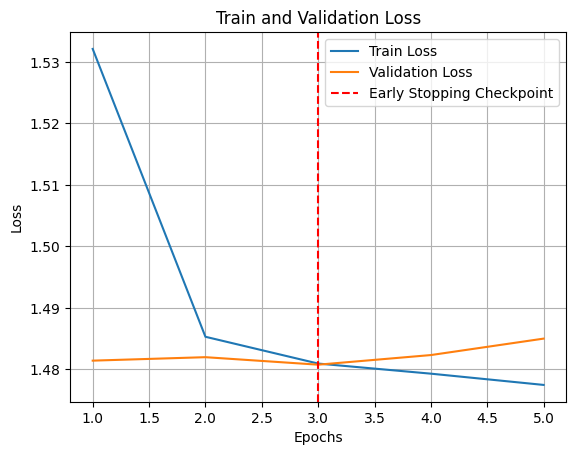

In [11]:
import matplotlib.pyplot as plt

# Generate x-axis values based on the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plotting the train_loss and valid_loss
plt.plot(epochs, train_loss, label='Train Loss')
plt.plot(epochs, valid_loss, label='Validation Loss')

# Find the index of the minimum validation loss
min_valid_loss_idx = valid_loss.index(min(valid_loss))

# Add a vertical line to mark the early stopping checkpoint
plt.axvline(x=min_valid_loss_idx + 1, linestyle='--', color='r', label='Early Stopping Checkpoint')

# Set labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.grid(True)

# Show legend
plt.legend()

# Display the plot
plt.show()

![red](./variety/red.png)

b) Implemente la CNN tal cual indica el diagrama de la imagen

In [12]:
import torch
import torch.nn as nn

class NeuralNetwork(nn.Module):
    def __init__(self, num_classes):
        super(NeuralNetwork, self).__init__()

        self.network = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=(3, 3)),
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3, 3)),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Dropout(0.25),

            nn.Flatten(),
            nn.Linear(in_features=9216, out_features=128),
            nn.Dropout(0.25),
            nn.Linear(in_features=128, out_features=num_classes),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        return self.network(x)


model = NeuralNetwork(num_classes=10)
print(model)

NeuralNetwork(
  (network): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Dropout(p=0.25, inplace=False)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=9216, out_features=128, bias=True)
    (8): Dropout(p=0.25, inplace=False)
    (9): Linear(in_features=128, out_features=10, bias=True)
    (10): Softmax(dim=1)
  )
)


In [13]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [14]:
import numpy as np
from torchmetrics.classification import Accuracy

def train_full(model, epochs, num_classes):
    train_losses = []
    valid_losses = []

    avg_train_losses = []
    avg_valid_losses = []

    accuracy = Accuracy(task="multiclass", num_classes=num_classes)

    model = model.to(device)

    for epoch in range(epochs):
        running_loss = 0.0
        running_val_loss = 0.0
        model.train()
        for batch, (images, labels) in enumerate(train_data):
            images = images.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            train_losses.append(loss.item())

            if batch % 500 == 0:
                print(f'Epoch: {epoch+1}/{epochs} | Batch: {batch+1}/{len(train_data)} | Loss: {running_loss/100:.4f}')
                running_loss = 0.0

        # Validación del model
        model.eval()
        with torch.no_grad():
            for _, (images, labels) in enumerate(val_data):
                images = images.to(device)
                labels = labels.to(device)

                outputs = model(images)

                _, predicted = torch.max(outputs, 1)

                loss = criterion(outputs, labels)

                accuracy.update(predicted.to('cpu'), labels.to('cpu'))

                running_val_loss += loss.item()
                valid_losses.append(loss.item())

        acc = accuracy.compute()
        print(f"Running Accuracy: {acc}")

        train_loss = np.average(train_losses)
        valid_loss = np.average(valid_losses)
        avg_train_losses.append(train_loss)
        avg_valid_losses.append(valid_loss)

        print(f'Epoch: {epoch+1}/{epochs} | Train Loss: {train_loss:.4f} | Valid Loss: {valid_loss:.4f}')

        train_losses = []
        valid_losses = []

    print(f"Accuracy promedio: {accuracy.compute()}")

    return model, avg_train_losses, avg_valid_losses

In [15]:
epochs = 15
num_classes = 10

model, train_loss, valid_loss = train_full(model,
                                      epochs, 
                                      num_classes)

Epoch: 1/15 | Batch: 1/938 | Loss: 0.0230
Epoch: 1/15 | Batch: 501/938 | Loss: 7.7977
Running Accuracy: 0.9679999947547913
Epoch: 1/15 | Train Loss: 1.5329 | Valid Loss: 1.4923
Epoch: 2/15 | Batch: 1/938 | Loss: 0.0151
Epoch: 2/15 | Batch: 501/938 | Loss: 7.4679
Running Accuracy: 0.968999981880188
Epoch: 2/15 | Train Loss: 1.4926 | Valid Loss: 1.4887
Epoch: 3/15 | Batch: 1/938 | Loss: 0.0150
Epoch: 3/15 | Batch: 501/938 | Loss: 7.4328
Running Accuracy: 0.972000002861023
Epoch: 3/15 | Train Loss: 1.4863 | Valid Loss: 1.4844
Epoch: 4/15 | Batch: 1/938 | Loss: 0.0151
Epoch: 4/15 | Batch: 501/938 | Loss: 7.4313
Running Accuracy: 0.9750000238418579
Epoch: 4/15 | Train Loss: 1.4847 | Valid Loss: 1.4785
Epoch: 5/15 | Batch: 1/938 | Loss: 0.0151
Epoch: 5/15 | Batch: 501/938 | Loss: 7.4134
Running Accuracy: 0.9764000177383423
Epoch: 5/15 | Train Loss: 1.4829 | Valid Loss: 1.4788
Epoch: 6/15 | Batch: 1/938 | Loss: 0.0147
Epoch: 6/15 | Batch: 501/938 | Loss: 7.4115
Running Accuracy: 0.97566664218

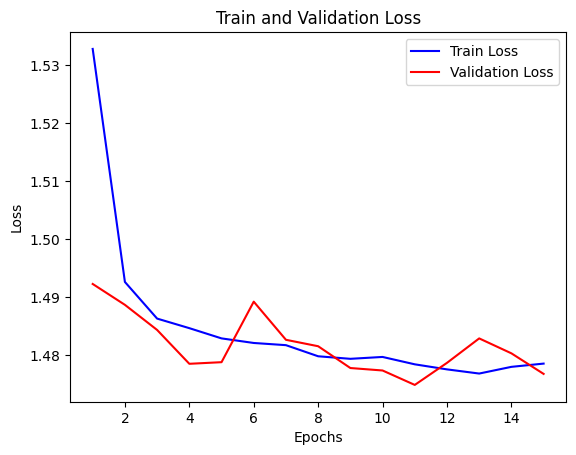

In [16]:
import matplotlib.pyplot as plt

# Generate x-axis values based on the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plotting the train_loss and valid_loss
plt.plot(epochs, train_loss, 'b', label='Train Loss')
plt.plot(epochs, valid_loss, 'r', label='Validation Loss')

# Set labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')

# Show legend
plt.legend()

# Display the plot
plt.show()

In [17]:
model = NeuralNetwork(num_classes=10)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [18]:
patience = 2
epochs = 15
num_classes = 10

model, train_loss, valid_loss = train_early(model, 
                                            patience, 
                                            epochs, 
                                            num_classes)

Epoch: 1/15 | Batch: 1/938 | Loss: 0.0230
Epoch: 1/15 | Batch: 501/938 | Loss: 7.7803
Running Accuracy: 0.9739999771118164
Epoch: 1/15 | Train Loss: 1.5300 | Valid Loss: 1.4874
Validation loss decreased (inf --> 1.487403).  Saving model ...
Epoch: 2/15 | Batch: 1/938 | Loss: 0.0149
Epoch: 2/15 | Batch: 501/938 | Loss: 7.4605
Running Accuracy: 0.9760000109672546
Epoch: 2/15 | Train Loss: 1.4906 | Valid Loss: 1.4821
Validation loss decreased (1.487403 --> 1.482095).  Saving model ...
Epoch: 3/15 | Batch: 1/938 | Loss: 0.0148
Epoch: 3/15 | Batch: 501/938 | Loss: 7.4306
Running Accuracy: 0.9776666760444641
Epoch: 3/15 | Train Loss: 1.4859 | Valid Loss: 1.4791
Validation loss decreased (1.482095 --> 1.479066).  Saving model ...
Epoch: 4/15 | Batch: 1/938 | Loss: 0.0148
Epoch: 4/15 | Batch: 501/938 | Loss: 7.4093
Running Accuracy: 0.9769999980926514
Epoch: 4/15 | Train Loss: 1.4820 | Valid Loss: 1.4870
EarlyStopping counter: 1 out of 2
Epoch: 5/15 | Batch: 1/938 | Loss: 0.0150
Epoch: 5/15 | 

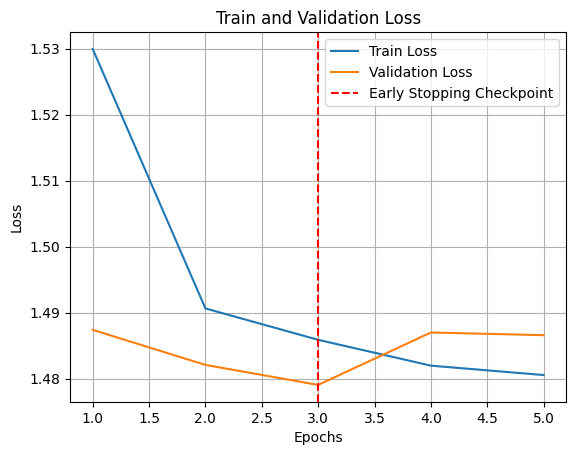

In [19]:
import matplotlib.pyplot as plt

# Generate x-axis values based on the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plotting the train_loss and valid_loss
plt.plot(epochs, train_loss, label='Train Loss')
plt.plot(epochs, valid_loss, label='Validation Loss')

# Find the index of the minimum validation loss
min_valid_loss_idx = valid_loss.index(min(valid_loss))

# Add a vertical line to mark the early stopping checkpoint
plt.axvline(x=min_valid_loss_idx + 1, linestyle='--', color='r', label='Early Stopping Checkpoint')

# Set labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.grid(True)

# Show legend
plt.legend()

# Display the plot
plt.show()

![red](./variety/red.png)


c) Implemente la CNN del diagrama omitiendo la capa maxpool y ajustando el stride en la segunda capa conv2d a razón de que el tamaño
de los tensores de esta capa sean igual al la salida de aplicar la capa maxpool en la red del inciso b.

In [20]:
import torch
import torch.nn as nn

class NeuralNetwork(nn.Module):
    def __init__(self, num_classes):
        super(NeuralNetwork, self).__init__()

        self.network = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=(3, 3)),
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3, 3), stride=2),
            nn.ReLU(),
            nn.Dropout(0.25),

            nn.Flatten(),
            nn.Linear(in_features=9216, out_features=128),
            nn.Dropout(0.25),
            nn.Linear(in_features=128, out_features=num_classes),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        return self.network(x)


model = NeuralNetwork(num_classes=10)
print(model)

NeuralNetwork(
  (network): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
    (3): ReLU()
    (4): Dropout(p=0.25, inplace=False)
    (5): Flatten(start_dim=1, end_dim=-1)
    (6): Linear(in_features=9216, out_features=128, bias=True)
    (7): Dropout(p=0.25, inplace=False)
    (8): Linear(in_features=128, out_features=10, bias=True)
    (9): Softmax(dim=1)
  )
)


In [21]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [22]:
epochs = 15
num_classes = 10

model, train_loss, valid_loss = train_full(model,
                                      epochs, 
                                      num_classes)

Epoch: 1/15 | Batch: 1/938 | Loss: 0.0230
Epoch: 1/15 | Batch: 501/938 | Loss: 7.9207
Running Accuracy: 0.9679999947547913
Epoch: 1/15 | Train Loss: 1.5512 | Valid Loss: 1.4935
Epoch: 2/15 | Batch: 1/938 | Loss: 0.0149
Epoch: 2/15 | Batch: 501/938 | Loss: 7.4943
Running Accuracy: 0.9704999923706055
Epoch: 2/15 | Train Loss: 1.4978 | Valid Loss: 1.4876
Epoch: 3/15 | Batch: 1/938 | Loss: 0.0149
Epoch: 3/15 | Batch: 501/938 | Loss: 7.4571
Running Accuracy: 0.9746666550636292
Epoch: 3/15 | Train Loss: 1.4901 | Valid Loss: 1.4791
Epoch: 4/15 | Batch: 1/938 | Loss: 0.0146
Epoch: 4/15 | Batch: 501/938 | Loss: 7.4323
Running Accuracy: 0.9760000109672546
Epoch: 4/15 | Train Loss: 1.4868 | Valid Loss: 1.4796
Epoch: 5/15 | Batch: 1/938 | Loss: 0.0151
Epoch: 5/15 | Batch: 501/938 | Loss: 7.4128
Running Accuracy: 0.9771999716758728
Epoch: 5/15 | Train Loss: 1.4836 | Valid Loss: 1.4790
Epoch: 6/15 | Batch: 1/938 | Loss: 0.0148
Epoch: 6/15 | Batch: 501/938 | Loss: 7.4159
Running Accuracy: 0.977833330

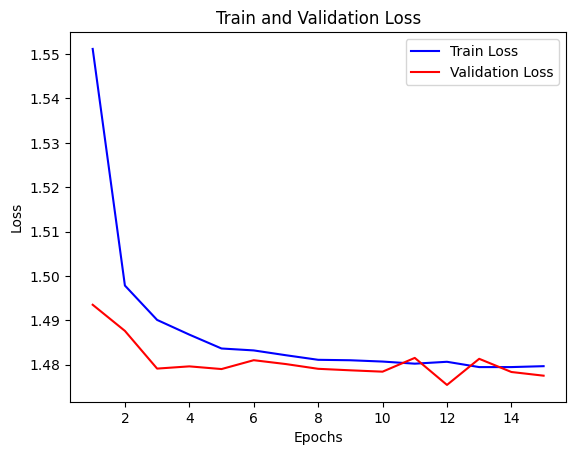

In [23]:
import matplotlib.pyplot as plt

# Generate x-axis values based on the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plotting the train_loss and valid_loss
plt.plot(epochs, train_loss, 'b', label='Train Loss')
plt.plot(epochs, valid_loss, 'r', label='Validation Loss')

# Set labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')

# Show legend
plt.legend()

# Display the plot
plt.show()

In [27]:
model = NeuralNetwork(num_classes=10)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [28]:
patience = 2
epochs = 15
num_classes = 10

model, train_loss, valid_loss = train_early(model, 
                                            patience, 
                                            epochs, 
                                            num_classes)

Epoch: 1/15 | Batch: 1/938 | Loss: 0.0230
Epoch: 1/15 | Batch: 501/938 | Loss: 7.9025
Running Accuracy: 0.9670000076293945
Epoch: 1/15 | Train Loss: 1.5475 | Valid Loss: 1.4954
Validation loss decreased (inf --> 1.495437).  Saving model ...
Epoch: 2/15 | Batch: 1/938 | Loss: 0.0150
Epoch: 2/15 | Batch: 501/938 | Loss: 7.4846
Running Accuracy: 0.9714999794960022
Epoch: 2/15 | Train Loss: 1.4958 | Valid Loss: 1.4864
Validation loss decreased (1.495437 --> 1.486441).  Saving model ...
Epoch: 3/15 | Batch: 1/938 | Loss: 0.0149
Epoch: 3/15 | Batch: 501/938 | Loss: 7.4442
Running Accuracy: 0.9723333120346069
Epoch: 3/15 | Train Loss: 1.4886 | Valid Loss: 1.4871
EarlyStopping counter: 1 out of 2
Epoch: 4/15 | Batch: 1/938 | Loss: 0.0149
Epoch: 4/15 | Batch: 501/938 | Loss: 7.4321
Running Accuracy: 0.9735000133514404
Epoch: 4/15 | Train Loss: 1.4860 | Valid Loss: 1.4838
Validation loss decreased (1.486441 --> 1.483763).  Saving model ...
Epoch: 5/15 | Batch: 1/938 | Loss: 0.0146
Epoch: 5/15 | 

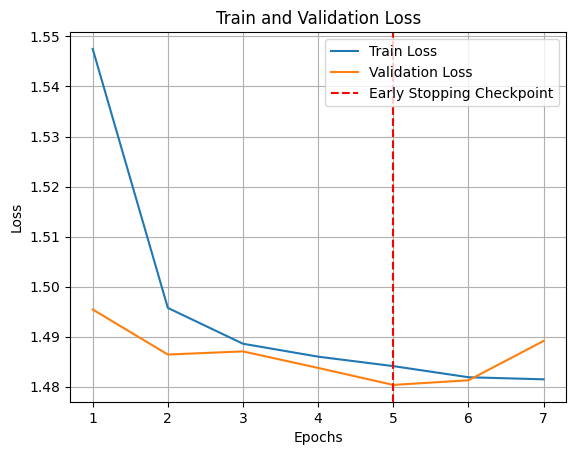

In [29]:
import matplotlib.pyplot as plt

# Generate x-axis values based on the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plotting the train_loss and valid_loss
plt.plot(epochs, train_loss, label='Train Loss')
plt.plot(epochs, valid_loss, label='Validation Loss')

# Find the index of the minimum validation loss
min_valid_loss_idx = valid_loss.index(min(valid_loss))

# Add a vertical line to mark the early stopping checkpoint
plt.axvline(x=min_valid_loss_idx + 1, linestyle='--', color='r', label='Early Stopping Checkpoint')

# Set labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.grid(True)

# Show legend
plt.legend()

# Display the plot
plt.show()

# Explicación

## Modelo sin Dropout

### Ventajas
- holaa

### Desventajas

## Modelo "original"

### Ventajas
- hola

### Desventajas

## Sin MaxPool pero con Stride 

### Ventajas
- hola

### Desventajas